In [1]:
from packages import *

# Versuchsnachrechnung Zweifeldplatte

Nachrechnung des Plattenversuchs aus @thoma_plattenversuche_2010. Gleiche Kraftintensität auf allen Zylindern. Eigengewicht hat keinen Einfluss auf Messung, Nullsetzung bei Belastungsbeginn.


![Isometrische Ansicht des Versuchsaufbaus, dargestellt sind der Versuchsaufbau, die Lagerung mit den Zylindern, die Krafteinleitung mittels den Zugstangen](../imgs/tho_aufbau_iso.svg){#fig-tho_aufbau_iso}

![Grundriss und Längsansicht, Lasteineinleitung, Lagerposition und die Plattenabmessungen sind vermasst](../imgs/tho_aufbau_gr.svg){#fig-tho_aufbau_gr}

## Versuchsbeschrieb

### Berechnungsgrössen

#### Betonstahl 

![Biegebewehrung der Platte](../imgs/tho_biegebewehrung_iso.svg){#fig-tho_biegebewehrung_iso}

In [2]:
diam_s = 10*un.mm

s = 150*un.mm
a_s = (diam_s**2*np.pi /4 /s).to(un.mm**2/un.m)

put_out(symbolic=True)

$$
\begin{aligned}
\oslash_{s}& = 10 \ \mathrm{mm} \quad & s& = 150 \ \mathrm{mm} \quad & a_{s}& = \frac{\pi \cdot \oslash_{s}^{2}}{4 \cdot s} = 523.6 \ \frac{\mathrm{mm}^{2}}{\mathrm{m}} \end{aligned}
$$

In [3]:
f_su = 558.6*un.N/un.mm**2
f_sy = 445.6*un.N/un.mm**2

E_s = 196.5*un.kN/un.mm**2

eps_sy = (f_sy / E_s).to(un.permille)
eps_su = 80.8*un.permille

put_out(symbolic=True)

$$
\begin{aligned}
f_{su}& = 558.6 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \quad & f_{sy}& = 445.6 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \quad & E_{s}& = 196.5 \ \frac{\mathrm{kN}}{\mathrm{mm}^{2}} \\ 
\varepsilon_{sy}& = \frac{f_{sy}}{E_{s}} = 2.27 \ \mathrm{‰} \quad & \varepsilon_{su}& = 80.8 \ \mathrm{‰} \quad &  
 \end{aligned}
$$

In [4]:
DF_b500b = pd.read_csv('imgs/tho_stress_strain_b500b.csv')
DF_b500b['x'] = DF_b500b['x']/100



In [5]:
# | echo: false

stress_b500b_array = np.array([0, f_sy.m, f_su.m]) * un.MPa
strain_b500b_array = np.array([0, eps_sy.to(un.los), eps_su.to(un.los)])

fig_b500b, ax_b500b = plt.subplots()
ax_b500b.plot(strain_b500b_array, stress_b500b_array.to(un.MPa).m, color="k")
ax_b500b.plot(DF_b500b.iloc[:,0], DF_b500b.iloc[:,1], color="gray", alpha=0.5)

# Scientific Notation if needed
apply_scientific_notation(ax_b500b, stress_b500b_array.m)

# Set axis labels
ax_b500b.set_ylabel(r"$\sigma$ [N/mm$^2$]")
ax_b500b.set_xlabel(r"$\varepsilon_s$ [-]")

# Set limits
# ax_b500b.set_xlim(xmax=140 / 1000)
# ax_b500b.set_ylim(ymax=700)

# Show the plot
# plt.tight_layout()
plt.savefig("imgs/tho_stress_strain_b500b.svg")
plt.close()

![Spannungs-Dehnungs-Diagramm des Betonstahls B500B mit grau hinterlegten Versuchsdaten und die Idealisierung eines bilinearen Verlaufs](../imgs/tho_stress_strain_b500b.svg){#fig-tho_stress_strain_b500b}

#### Beton 

In [6]:
f_cc = 28.61*un.N/un.mm**2
E_c = 22.9*un.kN/un.mm**2

f_c = (2.7* f_cc.m**(2/3))*un.N/un.mm**2
f_ct = (0.3* f_cc.m**(2/3))*un.N/un.mm**2

eps_cu = 5.*un.permille

put_out(symbolic=True, rows = 3)

$$
\begin{aligned}
f_{cc}& = 28.61 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \quad & E_{c}& = 22.9 \ \frac{\mathrm{kN}}{\mathrm{mm}^{2}} \quad & f_{c}& = 2.7 \cdot f_{cc}^{\frac{2}{3}} = 25.26 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \\ 
f_{ct}& = 0.3 \cdot f_{cc}^{\frac{2}{3}} = 2.81 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \quad & \varepsilon_{cu}& = 5.0 \ \mathrm{‰} \quad &  
 \end{aligned}
$$

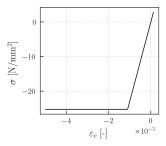

In [7]:
# | echo: false

stress_c_array = np.array([f_ct.m, -f_c.m, -f_c.m]) * un.MPa
strain_c_array = np.array([f_ct/E_c, -f_c/E_c, -eps_cu.to(un.los)])

fig_c, ax_c = plt.subplots()
ax_c.plot(strain_c_array, stress_c_array.to(un.MPa).m, color="k")

# Scientific Notation if needed
apply_scientific_notation(ax_c, stress_c_array.m)

# Set axis labels
ax_c.set_ylabel(r"$\sigma$ [N/mm$^2$]")
ax_c.set_xlabel(r"$\varepsilon_c$ [-]")

# Set limits
# ax_c.set_xlim(xmax=7 / 1000)
# ax_c.set_ylim(ymax=50)

# Show the plot
# plt.tight_layout()
plt.savefig("imgs/tho_stress_strain_c.svg")
# plt.close()

#### Geometrie

In [8]:
h = 200*un.mm
c_nom = 20*un.mm

put_out()

$$
\begin{aligned}
h& = 200 \ \mathrm{mm} \quad & c_{nom}& = 20 \ \mathrm{mm} \quad &  
 \end{aligned}
$$

### Versuchsergebnisse

Die Traglast liegt dabei bei 978 $kN$ pro Feld, dies entspricht der Summe aller Einzellasten.

In [9]:
F_u = 978*un.kN / 12

put_out(symbolic=True)

$$
\begin{aligned}
F_{u}& = \frac{978}{12} = 81.5 \ \mathrm{kN} \quad &  \quad &  
 \end{aligned}
$$

In [10]:
DF_res_V10 = pd.read_csv('imgs/tho_res_V10.csv')


In [11]:
DF_res_V10

,x,y
0,0.543478,-2.723312
1,1.086957,87.145969
2,1.086957,160.675381
3,3.260870,220.588235
4,3.804348,277.777778
5,5.978261,340.413943
6,10.326087,392.156863
7,16.304348,460.239651
8,15.760870,307.734205
9,7.608696,13.616558


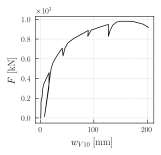

In [12]:
# | echo: false


fig_res_V10, ax_res_V10 = plt.subplots()
ax_res_V10.plot(DF_res_V10.iloc[:,0], DF_res_V10.iloc[:,1], color="k")


# Set axis labels
ax_res_V10.set_ylabel(r"$F$ [kN]")
ax_res_V10.set_xlabel(r"$w_{V10}$ [mm]")


fig_res_V10.savefig("imgs/tho_res_V10.svg")


![Kraft-Verformungs-Diagramm an der Stelle $V10$, entnommen aus dem Versuchsbericht](../imgs/tho_res_V10.svg){#fig-tho_res_V10}

## Modellierung

![Ein Trägerrostmodell zur Ermittlung des Biegeverhaltens. Der Abstand der Balken ist hier lediglich schematisch gezeigt](../imgs/tho_rost_iso.svg){#fig-tho_rost_iso}

Folgende Effekte werden beim Modell berücksichtigt:
- Biegetragverhalten
- Drillmomente, sprich Torsion der Stäbe im Trägerrost.

### Querschnittsanalyse


![Querschnittsanalyse](../imgs/thesis_skizzen-2.jpg)



Rissmoment

In [13]:
b_w =0.1*un.m
z = h - 2/3 * h/2
F_c = (h/2 * f_ct * b_w *1/2).to(un.kN)
M_r = (F_c * z).to(un.kNm)

chi_r = (f_ct/E_c /(h/2)).to(1/un.km)

put_out(symbolic=True, evaluate=True)

$$
\begin{aligned}
b_{w}& = 0.1 \ \mathrm{m} \quad & z& = \frac{2 \cdot h}{3} = 133.33 \ \mathrm{mm} \quad & F_{c}& = \frac{b_{w} \cdot f_{ct} \cdot h}{4} = 14.03 \ \mathrm{kN} \\ 
M_{r}& = F_{c} \cdot z = 1.87 \ \mathrm{kNm} \quad & \chi_{r}& = \frac{2 \cdot f_{ct}}{E_{c} \cdot h} = 1.23 \ \frac{1}{\mathrm{km}} \quad &  
 \end{aligned}
$$

Fliessen der Zugbewehrung. Dabei wird ein dreieckiger Spannungsverlauf für den Beton angesetzt.


In [14]:
A_s = a_s*b_w
sigma_s_2 = 500*un.N/un.mm**2
d_apos = h - c_nom - diam_s / 2
x = ((A_s*f_sy) / (f_c*b_w*1/2 )).to(un.mm)
put_out(symbolic=True)



$$
\begin{aligned}
A_{s}& = a_{s} \cdot b_{w} = 52.36 \ \mathrm{mm}^{2} \quad & \sigma_{s 2}& = 500.0 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \quad & {d}'& = - \frac{\oslash_{s}}{2} - c_{nom} + h = 175.0 \ \mathrm{mm} \\ 
x& = \frac{A_{s} \cdot f_{sy}}{1 \cdot \frac{1}{2} \cdot b_{w} \cdot f_{c}} = 18.48 \ \mathrm{mm} \quad &  \quad &  
 \end{aligned}
$$

Nun wird kontrolliert ob der Beton sich noch im elastischen Bereich befindet:

In [15]:
eps_c = (f_sy / E_s  / (d_apos - x) * x).to(un.permille)
sigma_c = (eps_c * E_c).to(un.N/un.mm**2)
f_c

put_out(symbolic=True)


$$
\begin{aligned}
\varepsilon_{c}& = \frac{f_{sy} \cdot x}{E_{s} \cdot \left({d}' - x\right)} = 0.27 \ \mathrm{‰} \quad & \sigma_{c}& = E_{c} \cdot \varepsilon_{c} = 6.13 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \quad & f_{c}& = 2.7 \cdot f_{cc}^{\frac{2}{3}} = 25.26 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \end{aligned}
$$

Die Spannung bei der Randfaser ist deutlich kleiner als die Druckfestigkeit. Folglich plastifiziert der Beton bei Weitem noch nicht.

In [16]:
z = d_apos - 1/3*x
F_s = (A_s * f_sy ).to(un.kN)
M_y = (F_s * z).to(un.kNm)
chi_y = (eps_sy /(d_apos-x)).to(1/un.km)

put_out(symbolic=True,rows=2)

$$
\begin{aligned}
z& = {d}' - 1 \cdot \frac{1}{3} \cdot x = 168.84 \ \mathrm{mm} \quad & F_{s}& = A_{s} \cdot f_{sy} = 23.33 \ \mathrm{kN} \\ 
M_{y}& = F_{s} \cdot z = 3.94 \ \mathrm{kNm} \quad & \chi_{y}& = \frac{\varepsilon_{sy}}{{d}' - x} = 14.49 \ \frac{1}{\mathrm{km}} \end{aligned}
$$

Abschliessend lässt sich der Biegewiderstand bestimmen. Dem Beton wird ein vollständiges Plastifizieren vorausgesetzt. Dabei wird dem Stahl eine Dehnung vorausgesetzt.

![Querschnittsanalyse](../imgs/thesis_skizzen-3.jpg)

In [17]:
eps_s = 63*un.permille
sigma_s = np.interp(eps_s.to(un.los), strain_b500b_array, stress_b500b_array).to(un.N/un.mm**2)
f_su
put_out()

$$
\begin{aligned}
\varepsilon_{s}& = 63 \ \mathrm{‰} \quad & \sigma_{s}& = 532.99 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \quad & f_{su}& = 558.6 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \end{aligned}
$$

In [18]:
x = ((A_s*sigma_s) / (f_c*b_w*0.85)).to(un.mm)
eps_c = (eps_s  / (d_apos - x) * x).to(un.permille)
eps_cu

put_out(symbolic=True)


$$
\begin{aligned}
x& = \frac{A_{s} \cdot \sigma_{s}}{0.85 \cdot b_{w} \cdot f_{c}} = 13.0 \ \mathrm{mm} \quad & \varepsilon_{c}& = \frac{\varepsilon_{s} \cdot x}{{d}' - x} = 5.06 \ \mathrm{‰} \quad & \varepsilon_{cu}& = 5.0 \ \mathrm{‰} \end{aligned}
$$

Die Spannung bei der Randfaser ist deutlich kleiner als die Druckfestigkeit. Folglich plastifiziert der Beton bei Weitem noch nicht.

In [19]:
z = d_apos - 0.425*x
F_s = (A_s * sigma_s).to(un.kN)
M_u = (F_s * z).to(un.kNm)
chi_u = (eps_s /(d_apos-x)).to(1/un.km)

put_out(symbolic=True,rows=2, evaluate=True)

$$
\begin{aligned}
z& = {d}' - 0.425 \cdot x = 169.48 \ \mathrm{mm} \quad & F_{s}& = A_{s} \cdot \sigma_{s} = 27.91 \ \mathrm{kN} \\ 
M_{u}& = F_{s} \cdot z = 4.73 \ \mathrm{kNm} \quad & \chi_{u}& = \frac{\varepsilon_{s}}{{d}' - x} = 388.89 \ \frac{1}{\mathrm{km}} \end{aligned}
$$

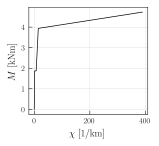

In [20]:
# | echo: false

My_qs_array = np.array([0, M_r.m, M_r.m, M_y.m, M_u.m]) * un.kNm
chi_qs_array = np.array([0, chi_r.m, (chi_y / M_y * M_r).m, chi_y.m, chi_u.m])/un.km

fig_M_chi, ax_M_chi = plt.subplots()
ax_M_chi.plot(chi_qs_array.to(1/un.km).m, My_qs_array.to(un.kNm).m, color="k")

# Scientific Notation if needed
apply_scientific_notation(ax_M_chi, chi_qs_array.m)

# Set axis labels
ax_M_chi.set_ylabel(r"$M$ [kNm]")
ax_M_chi.set_xlabel(r"$\chi$ [1/km]")

# Set limits
# ax_b500b.set_xlim(xmax=140 / 1000)
# ax_b500b.set_ylim(ymax=700)

# Show the plot
# plt.tight_layout()
plt.savefig("imgs/tho_M_chi.svg")
# plt.close()

![Momenten-Krümmungs-Beziehung des Querschnitts](../imgs/tho_M_chi.svg){#fig-tho_M_chi}

Das bestimmte Momenten-Krümmungs-Diagramm gilt für einen Meterstreifen. Aufgrund der identischen Bewehrung in beide Richtungen gilt das Momentenkrümmungsdiagramm für beide Richtungen. Obwohl sich kleine Differenzen bei der statischen Höhe ergeben.

### Trägerrost

In [21]:
l_El = b_w
n_gelenk = 2 #2 bei Stab anfang und ende
varphi = (chi_qs_array * l_El).to(un.rad)/n_gelenk

My_qs_array
put_out(symbolic=True, precision = 8, rows = 1)

$$
\begin{aligned}
l_{El}& = b_{w} = 0.1 \ \mathrm{m} \\ 
n_{gelenk}& = 2 \\ 
\varphi& = \frac{\chi_{qs Matrix} \cdot l_{El}}{n_{gelenk}} = \left[\begin{matrix}0.0\\6.127 \cdot 10^{-5}\\0.00034402\\0.00072439\\0.01944436\end{matrix}\right] \ \mathrm{rad} \\ 
My_{qs Matrix}& = My_{qs Matrix} = \left[\begin{matrix}0.0\\1.87086263\\1.87086263\\3.93933519\\4.72957488\end{matrix}\right] \ \mathrm{kNm} \end{aligned}
$$

In [22]:
# | echo: false

phi_qs_array = (chi_qs_array * l_El).to(un.rad)

fig_M_phi, ax_M_phi = plt.subplots()
ax_M_phi.plot(phi_qs_array.to(un.rad).m, My_qs_array.to(un.kNm).m, color="k")


# Set axis labels
ax_M_phi.set_ylabel(r"$M$ [kNm]")
ax_M_phi.set_xlabel(r"$\varphi$ [rad]")

# Set limits
# ax_b500b.set_xlim(xmax=140 / 1000)
# ax_b500b.set_ylim(ymax=700)

# Show the plot
# plt.tight_layout()
plt.savefig("imgs/tho_M_phi.svg")
plt.close()

::: {#fig-tho_biegung layout-ncol=2}

![Momenten-Krümmungs-Beziehung des Querschnitts](../imgs/tho_M_chi.svg){#fig-tho_M_chi}

![Momenten-Verdrehungs-Beziehung des Querschnitts](../imgs/tho_M_phi.svg){#fig-tho_M_phi}

Momenten-Krümmungs-Beziehung und Momenten-Verdrehungs-Beziehung für die Platte in globale $X$ und $Y$ Richtung.
:::

### Drillsteifigkeit

### Plastische Gelenke

In [23]:
eps_u_com_adm = eps_cu * (d_apos - x) / x

put_out(symbolic=True)

$$
\begin{aligned}
\varepsilon_{u , adm}& = \frac{\varepsilon_{cu} \cdot \left({d}' - x\right)}{x} = 62.31 \ \mathrm{‰} \quad &  \quad &  
 \end{aligned}
$$

In [24]:
# Annahme für die Länge des Gelenks
l_pl = 2 * d_apos

# Verformungsvermögen
Theta_max = (l_pl * (eps_cu / x  - eps_sy / (d_apos -x))).to(un.rad)
Theta_max_gelenk = Theta_max / 2 
put_out(symbolic=True, rows = 1, precision = 3)

$$
\begin{aligned}
l_{pl}& = 2 \cdot {d}' = 350.0 \ \mathrm{mm} \\ 
\Theta_{max}& = l_{pl} \cdot \left(\frac{\varepsilon_{cu}}{x} - \frac{\varepsilon_{sy}}{{d}' - x}\right) = 0.13 \ \mathrm{rad} \\ 
\Theta_{max gelenk}& = \frac{\Theta_{max}}{2} = 0.065 \ \mathrm{rad} \end{aligned}
$$

In [25]:
nu = 0.2 

k_r = (E_c * (h)**3 / (12*(1-nu))).to(un.kN*un.m/un.rad) /( n_gelenk) *0.2

put_out(symbolic=True)

$$
\begin{aligned}
\nu& = 0.2 \quad & k_{r}& = E_{c} \cdot h^{3} \cdot \frac{1}{12 \cdot \left(1 - \nu\right)} \cdot \frac{1}{n_{gelenk}} \cdot 0.2 = 1908.33 \ \frac{\mathrm{kN} \cdot \mathrm{m}}{\mathrm{rad}} \quad &  
 \end{aligned}
$$

## Modellergebnisse

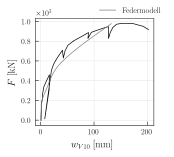

In [26]:
DF_rost_axis_V10 = pd.read_excel('calc/tho_axis_res.xlsx', sheet_name='V10')
DF_rost_axis_V10['eZ_1 [mm]']= -1*DF_rost_axis_V10['eZ_1 [mm]']


ax_res_V10.plot(DF_rost_axis_V10.iloc[:,1],  DF_rost_axis_V10.iloc[:,2]*F_u.to(un.kN).m*12/20, label='Federmodell', color='gray')
 
fig_res_V10.legend()
fig_res_V10.savefig("imgs/tho_res_V10_calc.svg")
fig_res_V10


## Vergleichsrechnung Normalmomentenfliessbedingung

In [27]:
DF_cubus_m = pd.read_excel('calc/thoma_cubus_res.xlsx')

DF_cubus_m.columns = DF_cubus_m.iloc[0, :] 
DF_cubus_m = DF_cubus_m.iloc[2:,:]

def bewehrungsmoment(m, mxy):
    if m < 0:
        return -m + abs(mxy)
    if m >=0:
        return m + abs(mxy)
    


# Bewehrungsmomentef für x Richtung
DF_cubus_m['m_x_bewehrung'] = DF_cubus_m.apply(
    lambda row: bewehrungsmoment(row['mx'], row['mxy']), axis=1
)

# Bewehrungsmomentef für y Richtung
DF_cubus_m['m_y_bewehrung'] = DF_cubus_m.apply(
    lambda row: bewehrungsmoment(row['my'], row['mxy']), axis=1
)





In [28]:
m_Rd = (a_s * f_sy *(d_apos - a_s*f_sy /(2*1000*f_c))).to(un.kNm/un.m)

put_out(symbolic=True)

$$
\begin{aligned}
m_{Rd}& = a_{s} \cdot f_{sy} \cdot \left(- \frac{a_{s} \cdot f_{sy}}{2 \cdot 1000 \cdot f_{c}} + {d}'\right) = 40.83 \ \frac{\mathrm{kNm}}{\mathrm{m}} \quad &  \quad &  
 \end{aligned}
$$